In [2]:
import pandas as pd

path=r"C:\Users\86178\Downloads\github_bot_raw_data.csv"
df=pd.read_csv(path)
# 计算去重前的数据量  
before_dropping_duplicates = df.shape[0]  

# 去除重复项  
df_deduped = df.drop_duplicates()  

# 计算去重后的数据量  
after_dropping_duplicates = df_deduped.shape[0]  

# 输出去重前后的数据量  
print(f"去重前的数据量: {before_dropping_duplicates}")  
print(f"去重后的数据量: {after_dropping_duplicates}")  

去重前的数据量: 20358
去重后的数据量: 19779


In [5]:
import pandas as pd  

# 加载数据  
path = r"C:\Users\86178\Downloads\github_bot_raw_data.csv"  
data = pd.read_csv(path)  
# 去除重复项  
data = data.drop_duplicates() 

# 2.缺失值处理
df = data.drop("gravatar_id", axis = 1)

print("查看各列缺失值情况:")
print(df.isnull().sum())

df['hireable'] = df['hireable'].notnull()
df['company'] = df['company'].notnull()
df['location'] = df['location'].notnull()

df.fillna({"name": ""}, inplace=True)
#df.fillna({"company": ""}, inplace=True)
df.fillna({"blog": ""}, inplace=True)
#df.fillna({"location": ""}, inplace=True)
df.fillna({"email": ""}, inplace=True)
df.fillna({"bio": ""}, inplace=True)
df.fillna({"twitter_username": ""}, inplace=True)

print("修改后查看各列缺失值情况:")
print(df.isnull().sum())

查看各列缺失值情况:
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8976
blog                   11262
location                7079
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64
修改后查看各列缺失值情况:
actor

In [4]:
import pandas as pd
 
# 读取CSV文件
df = pd.read_csv(r"C:\Users\86178\Downloads\github_bot_raw_data.csv")
 
# 1. 删除重复数据，并输出去重前后的数据量
df_deduplicated = df.drop_duplicates()
 
# 2. 缺失值处理
# 去掉 gravatar_id 列
df_deduplicated = df_deduplicated.drop(columns=['gravatar_id'])
 
# 将可转化成 boolean 变量的列字段转化成 boolean 变量
boolean_columns = ['site_admin', 'hireable']
for col in boolean_columns:
    df_deduplicated[col] = df_deduplicated[col].astype(bool)
 
# 文本数据用空字符串填充空值
text_columns = ['name', 'company', 'blog', 'location', 'email', 'bio', 'twitter_username']
for col in text_columns:
    df_deduplicated[col] = df_deduplicated[col].fillna('')

 # 3. 数据变换，将created_at、updated_at转为时间戳
date_columns = ['created_at', 'updated_at']
for col in date_columns:
    df_deduplicated[col] = pd.to_datetime(df_deduplicated[col]).astype(int) / 1e9  # 转为时间戳（秒）
 
# 显示处理后的数据
print(df_deduplicated.head())

   actor_id  label      login        id               node_id  \
0   1081405  Human    dlazesz   1081405  MDQ6VXNlcjEwODE0MDU=   
1  13100598  Human  sarkiroka  13100598  MDQ6VXNlcjEzMTAwNTk4   
2     22494  Human  ZoomQuiet     22494      MDQ6VXNlcjIyNDk0   
3   7648032    Bot   AlCutter   7648032  MDQ6VXNlcjc2NDgwMzI=   
4   2163522  Human    meetyan   2163522  MDQ6VXNlcjIxNjM1MjI=   

                                          avatar_url  \
0  https://avatars.githubusercontent.com/u/108140...   
1  https://avatars.githubusercontent.com/u/131005...   
2  https://avatars.githubusercontent.com/u/22494?v=4   
3  https://avatars.githubusercontent.com/u/764803...   
4  https://avatars.githubusercontent.com/u/216352...   

                                      url                      html_url  \
0    https://api.github.com/users/dlazesz    https://github.com/dlazesz   
1  https://api.github.com/users/sarkiroka  https://github.com/sarkiroka   
2  https://api.github.com/users/ZoomQuiet  http

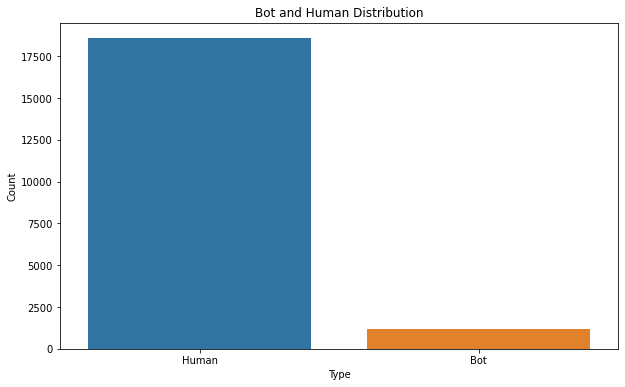

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 label 列表示类型（bot 或 human）
label_counts = df_deduplicated['label'].value_counts()

# 绘制计数图
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df_deduplicated)
plt.title('Bot and Human Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

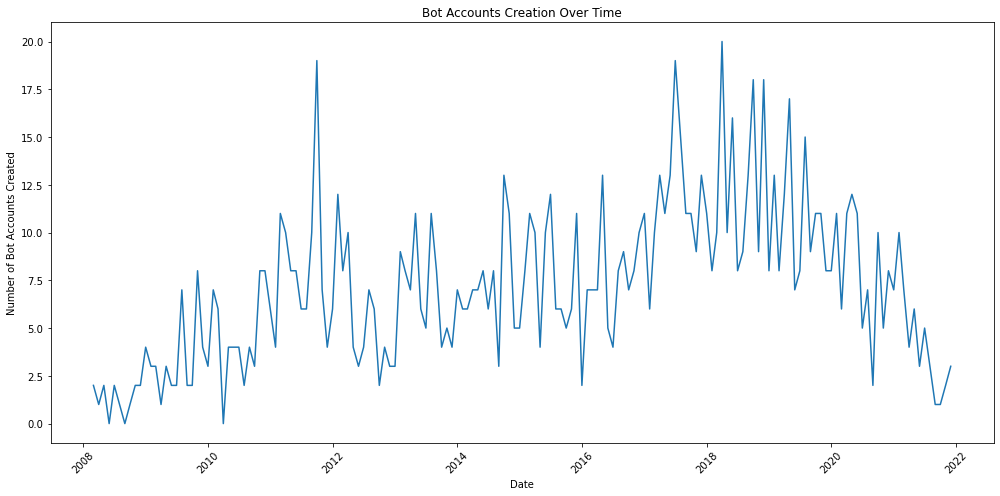

In [7]:
import seaborn as sns  
import matplotlib.pyplot as plt  
import pandas as pd  

# 假设 df_deduplicated 是已经处理好的 DataFrame，且包含了我们需要的列  
# 筛选出 bot 类型的账号  
bot_accounts = df_deduplicated[df_deduplicated['label'] == 'Bot'].copy()  # 使用 .copy() 创建副本  

# 将 created_at 列从时间戳转换回 datetime 格式  
# 如果 created_at 是时间戳（秒级），则转换为 datetime 格式  
bot_accounts['created_at'] = pd.to_datetime(bot_accounts['created_at'], unit='s')  

# 对时间进行重采样，例如按月统计 bot 账号的创建数量  
bot_accounts_resampled = bot_accounts.set_index('created_at').resample('M').size().reset_index(name='bot_count')  

# 绘制时间线图表  
plt.figure(figsize=(14, 7))  
sns.lineplot(x='created_at', y='bot_count', data=bot_accounts_resampled)  
plt.title('Bot Accounts Creation Over Time')  
plt.xlabel('Date')  
plt.ylabel('Number of Bot Accounts Created')  
plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示  
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域  
plt.show()

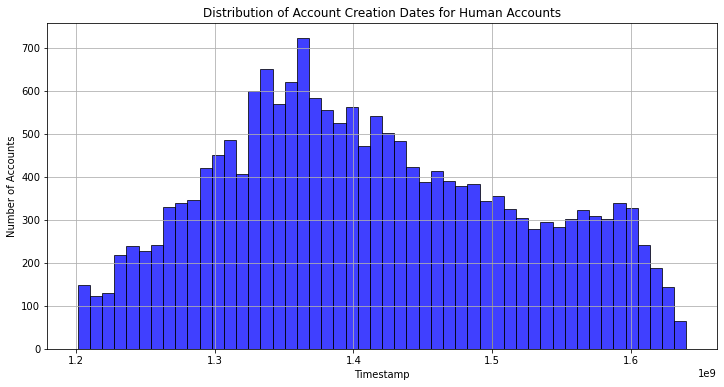

In [8]:
# 可视化human类型账号的created_at情况
human_accounts = df_deduplicated[df_deduplicated['label'] == 'Human']
 
plt.figure(figsize=(12, 6))
plt.hist(human_accounts['created_at'], bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of Account Creation Dates for Human Accounts')
plt.xlabel('Timestamp')
plt.ylabel('Number of Accounts')
plt.grid(True)
plt.show()

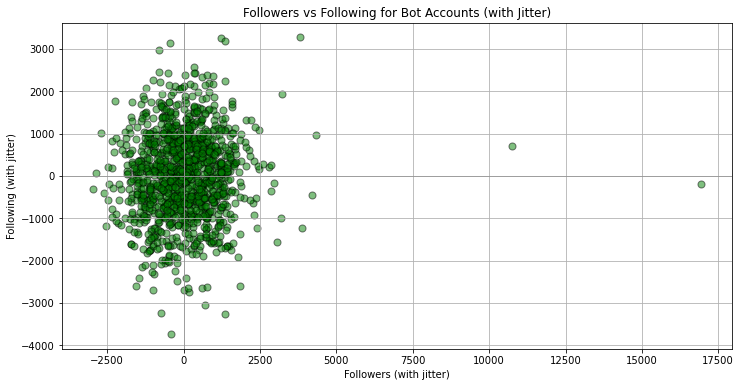

In [12]:
import numpy as np  

# 过滤掉 followers 或 following 为 NaN 的行  
bot_accounts = bot_accounts.dropna(subset=['followers', 'following'])  

# Jitter 处理  
jitter_strength = 1000  # 控制 jitter 的强度  
bot_accounts['followers_jitter'] = bot_accounts['followers'] + np.random.normal(0, jitter_strength, bot_accounts.shape[0])  
bot_accounts['following_jitter'] = bot_accounts['following'] + np.random.normal(0, jitter_strength, bot_accounts.shape[0])  

# 绘制散点图  
plt.figure(figsize=(12, 6))  
plt.scatter(bot_accounts['followers_jitter'], bot_accounts['following_jitter'], alpha=0.5, color='green', edgecolor='black', s=50)  
plt.title('Followers vs Following for Bot Accounts (with Jitter)')  
plt.xlabel('Followers (with jitter)')  
plt.ylabel('Following (with jitter)')  
plt.grid(True)  
plt.axhline(y=0, color='grey', linewidth=0.5)  
plt.axvline(x=0, color='grey', linewidth=0.5)  
plt.show()

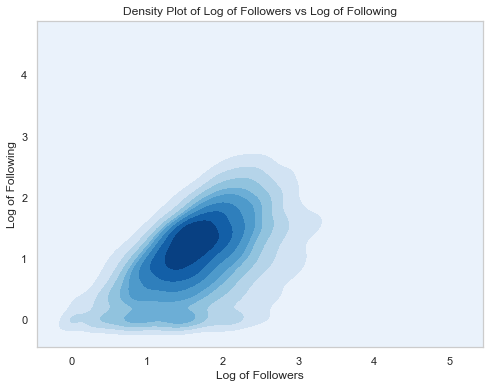

In [16]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  

# 1. 加载CSV文件  
human_df = pd.read_csv(r"C:\Users\86178\Downloads\github_bot_raw_data.csv")

# 2. 数据预处理：过滤出人类类型的账号  
human_df = human_df[human_df['label'] == 'Human']  

# 3. 计算 followers 和 following 的对数  
human_df['followers_log'] = np.log10(human_df['followers'].replace(0, np.nan))  # 替换0以避免取对数时出现问题  
human_df['following_log'] = np.log10(human_df['following'].replace(0, np.nan))  

# 4. 设置图形大小并绘制密度图  
plt.figure(figsize=(8, 6))  
sns.kdeplot(data=human_df, x='followers_log', y='following_log', fill=True, cmap='Blues', thresh=0)  

plt.xlabel('Log of Followers')  
plt.ylabel('Log of Following')  
plt.title('Density Plot of Log of Followers vs Log of Following')  
plt.grid(True)  
plt.show()